0. 코랩에서 데이터 파일 열기

In [1]:
#코랩에서 데이터 파일을 사용하기 위해 직접 업로드하는 코드
from google.colab import files
file_uploaded=files.upload()

Saving 인터넷반응DB_9월5주_11월1주.xlsx to 인터넷반응DB_9월5주_11월1주 (1).xlsx


(참고용) 구글 드라이브 마운트

In [2]:
#코랩에서 구글 드라이브에 올린 파일을 사용하기 위해 마운트(연결)하는 코드
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


코랩에서 한글 폰트 사용하기

- 코랩에서 이 과정 없이 한글을 쓰면 깨져서 나옴.

In [3]:
# 그래프에 한글 폰트 사용하는 코드 -> 실행 후 [런타임]-[런타임 다시 시작] 메뉴를 이용하여 런타임 재시작!
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [9]:
#런타임 재시작 이후 한글 폰트 선택
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

데이터 불러오기(135쪽)

- 인터넷 반응 지표 데이터 불러오기

In [16]:
import pandas as pd                                                           # 판다스 라이브러리 불러오기
df=pd.read_excel('인터넷반응DB_9월5주_11월1주.xlsx',engine='openpyxl')                          # 인터넷 반응 지표 데이터 불러오기                                                                          # 구글 드라이브에 저장한 데이터 경로
df.shape

(817, 18)

데이터 살펴보기(135~136쪽)

- 데이터의 전체 크기 확인

In [18]:
    # 전체 행과 열의 개수
    df.shape

(817, 18)

- 인터넷 반응 지표 데이터의 속성 (컬럼 파악하기)

In [31]:
df.head()

,주차,프로그램명,채널,요일,게시글,댓글,동영상 조회,뉴스,동영상,게시글 비율,댓글 비율,동영상 조회 비율,뉴스 비율,동영상 비율,가구,2049,가구 시청률,2049 시청률
0,202239,* 라디오스타,MBC,수,214,658,1040480,377,47,0.7,0.6,1.4,1.5,0.9,798107,400677,4.0,1.8
1,202239,알토란,MBN,화,95,182,6703,16,44,0.3,0.2,0.0,0.1,0.8,166179,21020,0.8,0.1
2,202239,엄지의제왕,MBN,화,28,3,21807,0,24,0.1,0.0,0.0,0.0,0.4,121993,67785,0.6,0.3
3,202239,이제 만나러 갑니다,채널A,일,13,9,38800,20,25,0.0,0.0,0.1,0.1,0.5,166790,74058,0.8,0.3
4,202239,불후의 명곡,KBS2,토,358,1324,244385,222,52,1.2,1.2,0.3,0.9,1.0,1330395,348610,6.6,1.6


- 인터넷 반응 지표 데이터의 비어 있는 속성 확인 (결측치)

In [32]:
df.isna().sum()   # isna() 함수는 결측 값에 대해 True를 표시해 주며, sum() 함수는 true(=1)인 값들의 합을 계산함.

주차           0
프로그램명        0
채널           0
요일           0
게시글          0
댓글           0
동영상 조회       0
뉴스           0
동영상          0
게시글 비율       0
댓글 비율        0
동영상 조회 비율    0
뉴스 비율        0
동영상 비율       0
가구           0
2049         0
가구 시청률       0
2049 시청률     0
dtype: int64

- df_c에 개수로 된 데이터와 정답 데이터만 저장

In [35]:
df_c = df[['프로그램명','게시글','댓글','동영상 조회','뉴스','동영상','가구 시청률','2049 시청률']]
df_c

,프로그램명,게시글,댓글,동영상 조회,뉴스,동영상,가구 시청률,2049 시청률
0,* 라디오스타,214,658,1040480,377,47,4.0,1.8
1,알토란,95,182,6703,16,44,0.8,0.1
2,엄지의제왕,28,3,21807,0,24,0.6,0.3
3,이제 만나러 갑니다,13,9,38800,20,25,0.8,0.3
4,불후의 명곡,358,1324,244385,222,52,6.6,1.6
...,...,...,...,...,...,...,...,...
812,세컨 하우스,56,42,34207,427,34,3.7,1.0
813,* 버디보이즈,17,182,15500,38,34,0.5,0.1
814,팬레터를 보내주세요,19,11,0,0,0,0.0,0.0
815,복덩이들고,31,341,5593,92,2,0.0,0.0


- 데이터 속성들의 관계 수치로 나타내기

In [37]:
df_c.corr()   # corr() 함수는 속성들의 관계를 상관 계수로 나타냄.

,게시글,댓글,동영상 조회,뉴스,동영상,가구 시청률,2049 시청률
게시글,1.000000,0.876243,0.736518,0.657469,0.431793,0.226169,0.351078
댓글,0.876243,1.000000,0.626708,0.606432,0.375832,0.233715,0.340065
동영상 조회,0.736518,0.626708,1.000000,0.587113,0.516178,0.274593,0.409148
뉴스,0.657469,0.606432,0.587113,1.000000,0.488681,0.409279,0.508137
동영상,0.431793,0.375832,0.516178,0.488681,1.000000,0.460855,0.469175
가구 시청률,0.226169,0.233715,0.274593,0.409279,0.460855,1.000000,0.894023
2049 시청률,0.351078,0.340065,0.409148,0.508137,0.469175,0.894023,1.000000


데이터 시각화하기

① 전체 데이터에 대한 시청률 속성과 다른 데이터 속성들의 관계 시각화하기

- 전체 데이터에 대한 시청률 속성과 다른 속성들의 관계 시각화

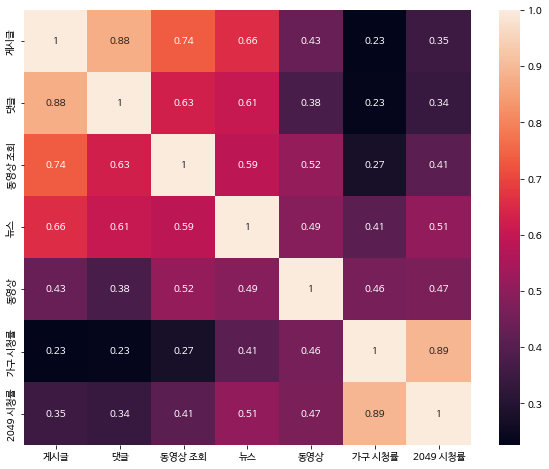

In [38]:
import matplotlib.pyplot as plt                           # 맷플롯립 파이플롯 라이브러리 불러오기
import seaborn as sns                           # 시본 라이브러리 불러오기
plt.figure(figsize=(10,8))                           # 파이플롯에 있는 figure() 함수로 크기 조정
sns.heatmap(df_c.corr(),annot=True)                           # 시본 라이브러리에 있는 heatmap() 함수로 상관 계수 시각화

② 특정 데이터에 대한 시청률 속성과 다른 데이터 속성들의 관계 시각화하기

- 속성 이름과 비교 연산자를 이용한 최고 시청률 프로그램 탐색

In [ ]:
# 속성 이름과 비교 연산자를 이용하여 시청률이 가장 높은 프로그램명 검색


- df_p에 최고 시청률 프로그램의 데이터 속성 저장

In [ ]:
# 가장 높은 시청률 프로그램명을 이용하여 해당 프로그램 데이터 속성만 df_p에 저장


- 특정 프로그램에 대한 시청률 속성과 다른 속성의 관계 시각화

In [ ]:
# 파이플롯에 있는 figure() 함수로 크기 조정
# title() 함수로 그래프 제목 넣기


③ 여러 데이터 속성이 프로그램마다 어떤 역할을 하는지 확인하기

- 시청률 높은 프로그램명 검색하기

In [ ]:
# 속성 이름과 비교 연산자를 이용하여 시청률 15프로 이상의 프로그램명을 검색


- df_m에 3개의 프로그램 정보 저장

In [ ]:
# 속성 이름과 append() 함수를 이용하여 세 개의 프로그램의 정보를 df_m에 저장함.


- 시청률 높은 프로그램에 대한 시청률 속성과 다른 속성의 관계 시각화

- 시청자 반응 데이터 속성들이 프로그램을 식별할 수 있는지 확인하기